In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [32]:
data = pd.read_csv('final_clusters.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,자치구,노인인구수,역개수,무료급식소개수,시설개수,평균소득
0,종로구,27704,15,5,8,5500.653548
1,중구,24660,23,2,11,5987.035233
2,용산구,38478,10,3,7,5550.348108
3,성동구,47530,14,5,19,4731.800000
4,광진구,53737,11,2,22,5643.548667


In [6]:
data.iloc[:,1:6].corr()

,노인인구수,역개수,무료급식소개수,시설개수,평균소득
노인인구수,1.000000,0.064610,0.276681,0.815743,0.056324
역개수,0.064610,1.000000,-0.201225,-0.079248,0.572440
무료급식소개수,0.276681,-0.201225,1.000000,0.315307,0.002370
시설개수,0.815743,-0.079248,0.315307,1.000000,-0.317546
평균소득,0.056324,0.572440,0.002370,-0.317546,1.000000


C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


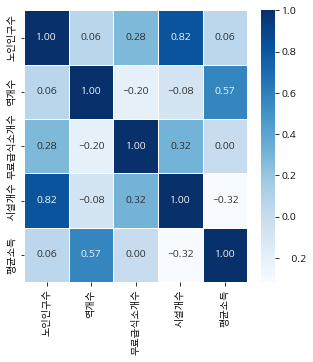

In [9]:
plt.rcParams["font.family"] = "Hancom Gothic"
plt.figure(figsize=(5,5))
sns.heatmap(data = data.iloc[:,1:6].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

### 노인인구수와 노인복지시설개수는 강한 상관관계를 보이고, 역개수, 평균소득은 다른 변수들과 상관관계가 거의 없거나 음의 상관관계임
### 변수들을 직접 선정하였기 때문에 생각보다 높은 상관관계를 보이지 않았지만 노인인구수와 나머지 변수가 음의 관계가 아니니 활용할 수 있을 것

### -> (k-means 군집분석 후) 군집0과 군집3의 차이가 애매하니 굳이 변수 하나를 지워보자면 역개수를 지우는 게 나을 것 같음

### 역개수 변수를 제거해봄

C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


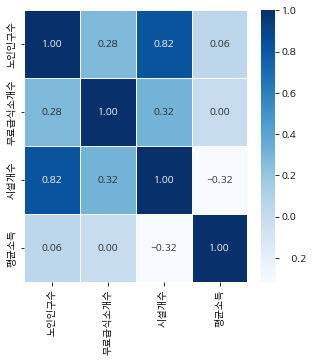

In [105]:
plt.rcParams["font.family"] = "Hancom Gothic"
plt.figure(figsize=(5,5))
sns.heatmap(data = data.iloc[:,[1,3,4,5]].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

### 역개수를 제거한 데이터는 data3로 data2로 군집분석 한 이후에 진행함(후반부에)

In [45]:
data2 = data.iloc[:,[1,2,3,4,5]]
data2

,노인인구수,역개수,무료급식소개수,시설개수,평균소득
0,27704,15,5,8,5500.653548
1,24660,23,2,11,5987.035233
2,38478,10,3,7,5550.348108
3,47530,14,5,19,4731.800000
4,53737,11,2,22,5643.548667
5,64255,6,2,35,3750.812000
6,74790,8,11,48,3855.080000
7,77293,9,11,28,3950.206275
8,66170,3,11,35,3587.515714
9,66942,3,0,29,3728.169286


In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled = sc.fit_transform(data2)
pd.DataFrame(scaled)

C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is de

,0,1,2,3,4
0,-1.954359,0.641954,-0.387738,-1.764145,0.094798
1,-2.108383,1.900687,-1.173692,-1.492460,0.335343
2,-1.409203,-0.144754,-0.911707,-1.854707,0.119375
3,-0.951179,0.484612,-0.387738,-0.767965,-0.285446
4,-0.637109,0.012587,-1.173692,-0.496279,0.165468
5,-0.104906,-0.774121,-1.173692,0.681025,-0.770604
6,0.428157,-0.459438,1.184172,1.858330,-0.719037
7,0.554806,-0.302096,1.184172,0.047092,-0.671991
8,-0.008009,-1.246146,1.184172,0.681025,-0.851364
9,0.031054,-1.246146,-1.697662,0.137654,-0.781802


# 역개수 포함해서 표준화해서 k-means한 것(비계층)

<AxesSubplot:>

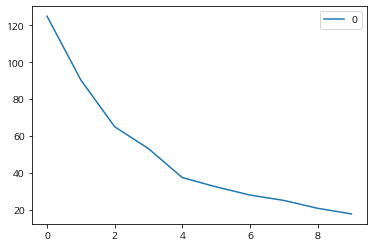

In [49]:
from sklearn.cluster import KMeans
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(scaled)
    value = kmeans.inertia_
    inertia.append(value)

pd.DataFrame(inertia).plot()
#k=4 이후부터 감소폭이 크지 않아 4개의 군집으로 나눠보기로 함

In [112]:
kmeans = KMeans(n_clusters=4).fit(scaled) #군집 4개로 나눔
data['cluster_id'] = kmeans.labels_
data

,자치구,노인인구수,역개수,무료급식소개수,시설개수,평균소득,cluster_id
0,종로구,27704,15,5,8,5500.653548,2
1,중구,24660,23,2,11,5987.035233,2
2,용산구,38478,10,3,7,5550.348108,2
3,성동구,47530,14,5,19,4731.800000,2
4,광진구,53737,11,2,22,5643.548667,3
5,동대문구,64255,6,2,35,3750.812000,3
6,중랑구,74790,8,11,48,3855.080000,0
7,성북구,77293,9,11,28,3950.206275,0
8,강북구,66170,3,11,35,3587.515714,0
9,도봉구,66942,3,0,29,3728.169286,3


In [113]:
data.groupby('cluster_id').count()

,자치구,노인인구수,역개수,무료급식소개수,시설개수,평균소득
cluster_id,,,,,,
0,8,8,8,8,8,8
1,2,2,2,2,2,2
2,5,5,5,5,5,5
3,10,10,10,10,10,10


In [114]:
#5개의 변수를 2개의 변수로 줄이는 작업 = 차원 축소
from sklearn.decomposition import PCA
X = scaled.copy()
pca = PCA(n_components=2) #객체

pca.fit(X) #적용
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster_id'] = data['cluster_id']
pca_df.head()

,0,1,cluster_id
0,2.541335,-0.582470,2
1,3.119876,0.332482,2
2,2.312628,-0.906767,2
3,1.199655,-0.374672,2
4,1.164680,-0.274214,3


C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from

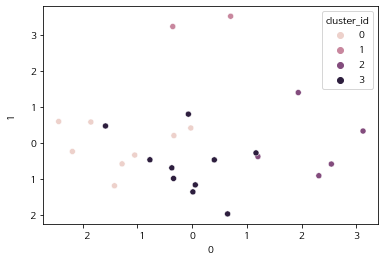

In [115]:
axs = plt.subplots()
axs = sns.scatterplot(x=0, y=1, hue='cluster_id', data=pca_df)

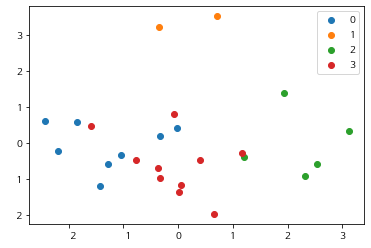

In [116]:
for i in sorted(pca_df['cluster_id'].unique()):
    tmp = pca_df.loc[pca_df['cluster_id'] == i]
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_df['cluster_id'].unique()))

In [117]:
data.sort_values('cluster_id')

,자치구,노인인구수,역개수,무료급식소개수,시설개수,평균소득,cluster_id
8,강북구,66170,3,11,35,3587.515714,0
14,양천구,72235,5,10,35,4539.065556,0
13,마포구,55533,16,11,29,5402.360244,0
11,은평구,89422,13,10,41,4255.108125,0
6,중랑구,74790,8,11,48,3855.080000,0
7,성북구,77293,9,11,28,3950.206275,0
15,강서구,96880,9,14,40,5025.340909,0
19,동작구,67872,12,9,29,5343.321667,0
23,송파구,103361,28,1,41,7312.896071,1
22,강남구,81564,21,11,24,12300.953548,1


#### 군집0은 노인인구비율이 보통-높음(55000-96000)이고, 소득은 낮음-보통인 자치구역(3500-5400)
#### 군집1은 노인인구비율이 높음(81000-100000)이고, 소득은 높음인 자치구역(7300-12300)
#### 군집2는 노인인구비율이 낮음-보통이고(24000-62000), 소득은 보통-높음인 자치구역(5500-10000)
#### 군집3은 노인인구비율이 보통-높음(42000-91000)이고, 소득은 낮음-보통 자치구역(3700-6000)

### -> 군집0과 군집3의 차이는 무료급식소의 개수인데 그 외에는 큰 차이없음
### -> 표준화를 안 한 것이 오히려 더 군집을 잘 나눔

# 역개수를 제외하고 표준화해서 k-means한 것

In [136]:
data3 = data.iloc[:,[1,3,4,5]]
data3.head()

,노인인구수,무료급식소개수,시설개수,평균소득
0,27704,5,8,5500.653548
1,24660,2,11,5987.035233
2,38478,3,7,5550.348108
3,47530,5,19,4731.800000
4,53737,2,22,5643.548667


In [137]:
sc = StandardScaler()
scaled2 = sc.fit_transform(data3)
pd.DataFrame(scaled2).head()

C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is de

,0,1,2,3
0,-1.954359,-0.387738,-1.764145,0.094798
1,-2.108383,-1.173692,-1.492460,0.335343
2,-1.409203,-0.911707,-1.854707,0.119375
3,-0.951179,-0.387738,-0.767965,-0.285446
4,-0.637109,-1.173692,-0.496279,0.165468


<AxesSubplot:>

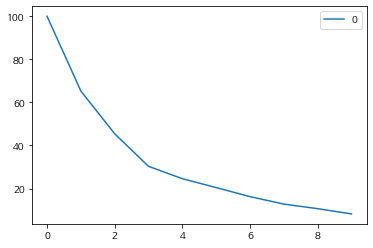

In [138]:
from sklearn.cluster import KMeans
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(scaled2)
    value = kmeans.inertia_
    inertia.append(value)

pd.DataFrame(inertia).plot()
#k=3 이후부터 감소폭이 크지 않아 3개의 군집으로 나눠보기로 함

In [139]:
kmeans = KMeans(n_clusters=3).fit(X) #군집 3개로 나눔
data['cluster_id'] = kmeans.labels_
data

,자치구,노인인구수,역개수,무료급식소개수,시설개수,평균소득,cluster_id
0,종로구,27704,15,5,8,5500.653548,1
1,중구,24660,23,2,11,5987.035233,1
2,용산구,38478,10,3,7,5550.348108,1
3,성동구,47530,14,5,19,4731.800000,1
4,광진구,53737,11,2,22,5643.548667,1
5,동대문구,64255,6,2,35,3750.812000,0
6,중랑구,74790,8,11,48,3855.080000,0
7,성북구,77293,9,11,28,3950.206275,0
8,강북구,66170,3,11,35,3587.515714,0
9,도봉구,66942,3,0,29,3728.169286,0


In [140]:
#5개의 변수를 2개의 변수로 줄이는 작업 = 차원 축소
from sklearn.decomposition import PCA
X = scaled.copy()
pca = PCA(n_components=2) #객체

pca.fit(X) #적용
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster_id'] = data['cluster_id']
pca_df.head()

,0,1,cluster_id
0,2.541335,-0.582470,1
1,3.119876,0.332482,1
2,2.312628,-0.906767,1
3,1.199655,-0.374672,1
4,1.164680,-0.274214,1


C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


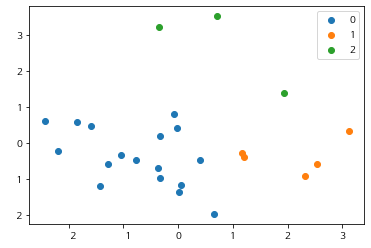

In [141]:
for i in sorted(pca_df['cluster_id'].unique()):
    tmp = pca_df.loc[pca_df['cluster_id'] == i]
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_df['cluster_id'].unique()))

In [142]:
data.sort_values('cluster_id')

,자치구,노인인구수,역개수,무료급식소개수,시설개수,평균소득,cluster_id
12,서대문구,55502,5,8,23,4359.313846,0
20,관악구,81848,4,6,29,5059.693333,0
19,동작구,67872,12,9,29,5343.321667,0
18,영등포구,63349,11,5,22,4277.224186,0
17,금천구,42226,1,7,18,4208.728000,0
16,구로구,74491,7,6,25,3995.732222,0
15,강서구,96880,9,14,40,5025.340909,0
14,양천구,72235,5,10,35,4539.065556,0
13,마포구,55533,16,11,29,5402.360244,0
11,은평구,89422,13,10,41,4255.108125,0


#### 군집0은 노인인구비율이 높고, 소득은 낮음인 자치구역
#### 군집1은 노인인구비율이 낮고, 소득은 보통인 자치구역
#### 군집2는 노인인구비율이 보통-높음이고, 소득은 높음인 자치구역

### 상대적으로 잘 나눴다고 할 수 있음
### 이 결과로 급식소의 개수를 정한다면 군집0에 많이, 군집1에 보통, 군집2에 조금

# 역개수 제외하고 표준화한 자료로 계층(합병)분석

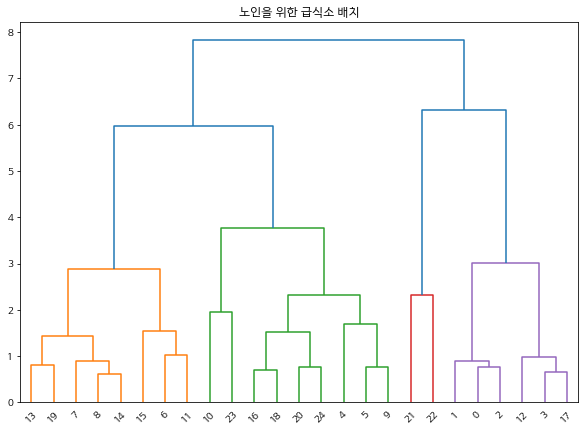

In [157]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("노인을 위한 급식소 배치")
dend = shc.dendrogram(shc.linkage(scaled2, method='ward'))

In [158]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
data['cluster_id2']=pd.DataFrame(cluster.fit_predict(scaled2))

In [159]:
from sklearn.decomposition import PCA
X = scaled.copy()
pca = PCA(n_components=2) #객체

pca.fit(X) #적용
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster_id'] = data['cluster_id2']
pca_df.head()

,0,1,cluster_id
0,2.541335,-0.582470,1
1,3.119876,0.332482,1
2,2.312628,-0.906767,1
3,1.199655,-0.374672,1
4,1.164680,-0.274214,0


C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


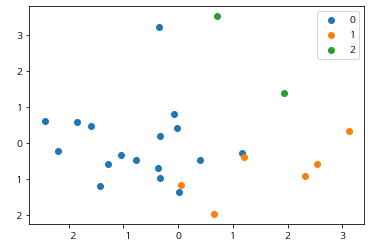

In [160]:
for i in sorted(pca_df['cluster_id'].unique()):
    tmp = pca_df.loc[pca_df['cluster_id'] == i]
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_df['cluster_id'].unique()))

In [161]:
data.sort_values('cluster_id2') #K-means로 할게

,자치구,노인인구수,역개수,무료급식소개수,시설개수,평균소득,cluster_id,cluster_id2
24,강동구,78191,14,4,31,6056.718947,0,0
14,양천구,72235,5,10,35,4539.065556,0,0
13,마포구,55533,16,11,29,5402.360244,0,0
23,송파구,103361,28,1,41,7312.896071,2,0
11,은평구,89422,13,10,41,4255.108125,0,0
10,노원구,91946,13,3,46,3808.196842,0,0
9,도봉구,66942,3,0,29,3728.169286,0,0
15,강서구,96880,9,14,40,5025.340909,0,0
8,강북구,66170,3,11,35,3587.515714,0,0
6,중랑구,74790,8,11,48,3855.080000,0,0
